In [1]:
import IPython.display as ipd
import numpy

In [2]:
fs = 10000
white_noise = numpy.random.rand(int(10*fs))
t = numpy.arange(0.0,10.0,1.0/fs)
signal = white_noise*(1 + 0.25 * numpy.sin(2.0*numpy.pi*1.0*t)+\
                      0.25 * numpy.sin(2.0*numpy.pi*2.0*t)+\
                     .25 * numpy.sin(2.0*numpy.pi*3.0*t)+\
                     .25 * numpy.sin(2.0*numpy.pi*4.0*t))

In [3]:
ipd.Audio(signal, rate=10000) # load a NumPy array

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

Text(0.5,0,'time in seconds')

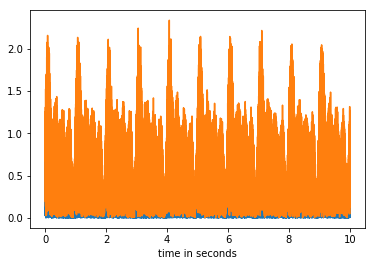

In [5]:
plt.plot(t, signal, label='signal')
plt.plot(t, amplitude_envelope, label='envelope')
plt.xlabel("time in seconds")


Text(0.5,0,'time in seconds')

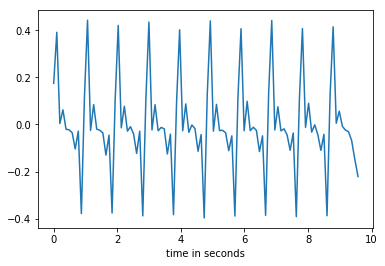

In [6]:
from scipy.signal import decimate
y = decimate(amplitude_envelope, 10)
t = decimate(t, 10)
y = decimate(y, 10)
t = decimate(t, 10)
y = decimate(y, 10)
t = decimate(t, 10)
y -= numpy.mean(y)
plt.plot(t, y, label='envelope')
plt.xlabel("time in seconds")


<StemContainer object of 3 artists>

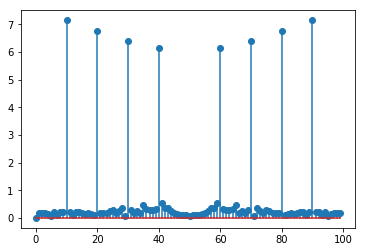

In [7]:
from scipy.fftpack import fft
plt.stem(numpy.abs(fft(y)))

In [8]:
attendu = 0.25 * numpy.sin(2.0*numpy.pi*1.0*t)+\
                      0.25 * numpy.sin(2.0*numpy.pi*2.0*t)+\
                     .25 * numpy.sin(2.0*numpy.pi*3.0*t)+\
                     .25 * numpy.sin(2.0*numpy.pi*4.0*t)

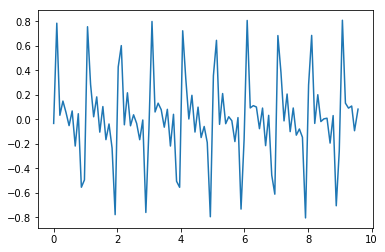

In [9]:
plt.plot(t, attendu)

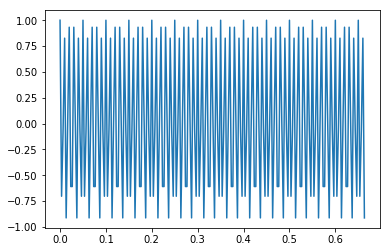

In [10]:
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt

FS= 3E2 # sample rate
N = 2E2 # samples
t = numpy.arange(0.0,N)
t /= FS

fc = 1E2 # carrier frequency
fm = 2E1  # modulation frequency

mod = 1E-1 * np.sin(2*np.pi*fm*t)
y = np.cos(2*np.pi*(fc*t + mod))

plt.plot(t,y)

analytic_signal = hilbert(y)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * FS)
                           

Text(0.5,0,'time in seconds')

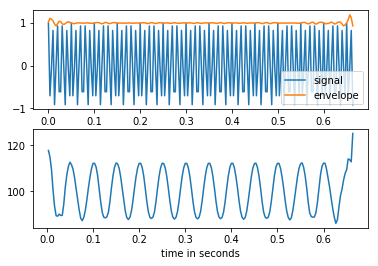

In [11]:
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, y, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
